# 5 Fourier Transforms 

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad
init_printing()                         # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

## Motivation and concept

Fourier transforms are of fundamental importance in the analysis of signals from many types of experiments; these range from infra-red spectroscopy, to x-ray crystallography, to images from MRI and CT scans and to seismology. Even in everyday life, Fourier transforms are important because they are used to produce the images observed in a digital television, in music and in most other forms of digital information processing.

Usually, the data, which might be a string of values taken at many sequential times, is transformed to allow the frequencies present be displayed and analysed. More fundamentally, the instruments used to measure infrared and NMR spectra produce data that is itself the Fourier transform of the spectrum, and similarly, in X-ray crystallography, the image of spots produced on the detector is the Fourier transform of the planes of atoms in a crystal. 

Although we concentrate on Fourier transforms, they are only one in a class of _integral_ transforms. The Abel transform is an integral transform that is used to recover the three-dimensional information from its two-dimensional image. It is used in such diverse areas as astronomy and the study of the photo-dissociation pathways of molecules. In photo-dissociation experiments, the fragments (atoms, ions, electrons) are spatially dispersed depending on where the breaking bond is pointing at the instant of dissociation. Their image is captured on a camera as 2D information and by transforming this, the geometry of the dissociation process can be determined (Whittaker 2007). Other transforms are the Hilbert, used in signal processing, and the Laplace, used to solve differential equations.

Folklore has it that Fourier transforms are formidably difficult and abstruse things. We know that they form the basis of the FTIR and NMR instrument, but secretly hope that nobody asks us how or why. In fact, Fourier transforms are quite straightforward but must be treated with respect. We are used to seeing the NMR or IR spectrum as a set of lines at different fixed frequencies and feel comfortable with this, but the raw data produced is a wiggly signal in which the information needed is almost totally obscured. This makes the process of unravelling this in a Fourier transform seems mysterious: ‘I cannot understand the data so where does the spectrum come from?' Contrariwise, we are used to interpreting speech and music that are oscillating signals in time, and would not easily understand either of them if Fourier transformed and viewed or heard as a continuously changing spectrum of frequencies.

We shall come back to this shortly but, briefly, a Fourier transform is an integral and therefore it can be evaluated by any of the methods used to solve integrals. 

## 5.1 Fourier transform equations

The Fourier transform integral is one of several types of integral transforms that have the general form

$$\displaystyle g(k)=\int f(x)G(k,x)dx      \tag{23}$$

The _transformed_ function is $g$ and the function being transformed is $f$. The algebraic expression $G$ is called the _kernel_ and this changes depending on the type of transform, Fourier, Abel, etc. The kernel for the Fourier transform is $\exp(\pm ikx)$ and so the forward transform takes a function $f(x)$ and returns $g(k)$. We could write this as $F(f(x))=g(k)$ and similarly the reverse transform $F^{-1}(g(k))=f(x)$. We shall only occasionally need to use this operator notation but for example $F(df(x)/dx)$ means make the fourier transform of the differential of $f(x)$ with respect to $x$. The fourier forwards and reverse equations are 

$$\displaystyle  g(k) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x)e^{-ikx}dx \quad\text{ or }\quad F(f(x))=g(k)\quad\text{ forward transform}  \tag{23a}$$

$$\displaystyle  f(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty g(k)e^{+ikx}dk \quad\text{ or }\quad F^{-1}(g(k))=f(x)\quad\text{ reverse transform} \tag{23b}$$


However, whatever form the transform takes it always occurs between pairs of conjugate variables, which are $x$ and $k$ in equation (23). Often these conjugate pairs are time (seconds) and frequency (1/seconds), or distance ($x$) and 1/distance ($k$). The reciprocal relationship between variables is why the transform converts time into frequency, changing, for example, an oscillating time profile into a spectrum. 

A second property is that these integral transforms are reversible, also called *invertible*, which means that $f$ can be changed into $g$ and $g$ can be changed into $f$ depending on which one we start with.

The notation and normalisation ($1/\sqrt{2\pi}$) varies quite a lot in the literature. It is common to add a hat or tilde to denote the transform thus if the function is $f$ the transform may be $F$ or $\hat F$ or $\tilde f$ etc. Sometimes $F^{-1}$ is used to describe the reverse transform as above. We shall use $f$ and $g$ to denote the transform and its reverse respectively. Similarly the symbols used for the conjugate variables vary, $u,v$ are common for general use, usually  $x,k$ for distance $x$ and inverse distance (wavevector $k$) and $t,\omega$ for time and natural frequency.

Solving the Fourier transform integral both algebraically and numerically will be described starting in Section 5.5, but first the role of the Fourier transform in FTIR and NMR experiments, and in X-ray crystallography is outlined.

## 5.2 The FTIR spectrometer

The Fourier transform infra-red (FTIR) spectrometer directly generates the autocorrelation of the spectrum by mechanically moving one mirror of a Michelson interferometer and measuring the oscillating signal generated by the change in the interference of the two infra-red beams on the detector produced by the difference in pathlength. This signal is then fourier transformed to produce the spectrum. Beams from both arms of the interferometer pass through the sample and all wavelengths are simultaneously measured on the detector. Figure 11 shows a (simulated) example of the raw data from the instrument and the IR spectrum produced after this is transformed. The signal is measured as intensity vs optical pathlength difference ($d$) of the two arms of the interferometer. After transformation, using the (discrete) fourier transform, the displacement from the centre of the (symmetrical) interference signal is in reciprocal distance or wavenumbers, cm$^{-1}$, which is proportional to the IR transition frequency.  

The FTIR spectrometer is an interferometer, therefore, the waves that have travelled down each of its arms are combined and so interfere on the detector's surface and this measures the intensity or the square of the sum of the two wave's amplitudes, Fig. 12, as a function of displacement between the two arms. The detector is slow, i.e. it cannot possibly follow the electric field of the radiation directly, at any given displacement, and so this means that the signal at each displacement is averaged in time. The i.r. frequency is typically $400 \to 4000\; \mathrm{cm^{-1}}$ or $\approx 10^{13}\to 10^{14}\;\mathrm{s^{-1}}$. 

Constructive interference occurs when the path length in both arms differ by zero or a whole number of wavelengths; destructive interference occurs when they are exactly out of phase and the difference in length is an odd multiple of half a wavelength. Destructive interference means that the radiation is returned towards the source not the detector. Were only one wavelength present, changing the path-length $d$ would make the signal on the detector change sinusoidally. The 'coherent' broadband infrared 'light' from the source contains many wavelengths, and at a given path-length, some constructively and some destructively interfere, but the signal is always greatest when both paths are of the same length. The relative path-length of the two arms of the interferometer is changed by mechanically moving one mirror; the full interference pattern is mapped out as a function of path-length and this pattern decreases in an oscillatory manner to some constant, but not zero value, as the difference in path length increases. This is shown in the left of Fig. 11. Because changing either path's length has the same effect, the signal is symmetrical about zero path difference. The general form of the interference pattern is that it is large at small path difference $d$ and decreases thereafter. This is because long wavelengths (low frequency) remain mostly in phase for a small $d$ and so do shorter wavelength waves,but less so and this leads to large oscillations when $d$ is small, then at larger path difference many waves become more or less out of phase leading to a smaller oscillating signal.

![Drawing](fourier-fig11.png)

Figure 11. Left: A simulated Fourier transform as might be produced directly by an FTIR spectrometer. (For clarity the large signal at zero delay has been clipped.) Right: The IR spectrum after Fourier transforming and converting into transmittance.
________________________

When the sample is placed in the beam, it absorbs certain frequencies depending on its particular nature, which results in a change in the signal's size on the detector and so the shape of the interferogram. The signal detected is $\langle |E(t)+E(t+\tau)|^2\rangle$ where the average, indicated by brackets ($\langle\cdots \rangle$) is over time $t$ (as mentioned previously the detector cannot follow the radiation's electric field); $\tau=d/c$ is the delay time introduced by the moving mirror. The electric field of the radiation is $E$ and the total signal is the sum of that from both arms and is squared because the detector can only measure intensity or $E^2$. On multiplying out this expression we find that the signal is proportional to the _autocorrelation_ of the electric field of the radiation which is  $\sim \langle E(t)E(t+\tau)\rangle $. The signal's size at each displacement ($d$) is proportional to the fourier transform of the autocorrelation via the Wiener-Kninchin theorem. Details of this are given later on in this chapter after autocorrelation is described.

The distance the mirrors are moved is accurately determined by using a visible laser that follows the same path in the interferometer, but does not pass through the sample. This laser produces an interference pattern on a second (photodiode) detector; the number of fringes passed as the arm of the interferometer moves is counted, by observing the signal zeros, and this is used to determine how far one mirror has moved relative to the other. As there is a limit to how far the moving mirror can be taken the interference signal is terminated prematurely compared to theory which would have it extend to infinity. The finite maximum delay limits the spectral resolution and additionally, at this point the signal can suddenly change in size and to avoid spurious lines caused by this, the transform may be multiplied by a decaying function to smoothly make its value zero at long excursion. This is called *apodising* and an example is given in section 9.7.

The FTIR spectrometer has the multiplex (Fellgett) advantage over a wavelength scanning instrument, because all wavelengths are simultaneously measured on a large area detector, which also receives a large and virtually noise free signal because slits to control spectral resolution are not needed as with a grating instrument, instead the ir radiation is made round and parallel. Avoiding an entrance slit and the extra light available as a result is called the Jaquinet advantage. Both Fellgett and Jaquinet advantages help to improve the signal to noise ratio. In comparison, in a scanning instrument, the radiation is detected through a narrow slit and the wavelength is changed by rotating a diffraction grating. In such an instrument the narrow slit, necessary for high resolution, is responsible for a poor signal to noise ratio because only a little radiation can reach the detector at any given wavelength. Scanning over the wavelengths also makes the experiment lengthy. 

An example of producing an interferogram and its analysis is given later on in this chapter (section 8.7) after fourier transforms are described.

![Drawing](fourier-fig12.png)

Figure 12. Schematic of an FTIR spectrometer as an interferometer. The laser is used to measure the relative distance of the two arms and does not pass through the sample. The curved mirror makes the infra-red beam parallel and a mask gives it a circular cross section as it enters the instrument. All the beam is measured by a large area detector.
_____

## 5.3 NMR

Possibly the most important analytical technique for the synthetic chemist is NMR spectroscopy. In an NMR experiment, the nuclear magnetization, which is the vector sum of the individual nuclear spins, is tipped from its equilibrium direction, which is along the direction of the huge permanent magnetic field $B$, by a relatively weak RF pulse of short duration. By applying this short pulse along the $x$- or $y$-axis, and therefore at $90^\text{o}$ to the permanent field, the magnetization is tipped away from the z-direction and experiences a torque and starts to precess. After the RF pulse has ended, the nuclear magnetization, and hence individual nuclear spins, undergoes a free induction decay (FID) by continuing to precess about the permanent magnetic field $B$. The rotating magnetization, Fig. 13, is measured by the detecting coil in the x-y plane as an oscillating and decaying signal, which, when Fourier transformed, produces the NMR spectrum.

In this experiment, the oscillating and decaying signal is converted into reciprocal time or frequency, which is ultimately displayed as a frequency shift $\delta$ in ppm from a standard compound, such as tetramethylsilane. In a classical sense, it is possible imagine the rotating nuclear magnetization repeatedly passing in front of the detection coil, thereby inducing a current to flow in it as it does so, and which will cause the output signal to rise and fall. Many such magnetizations from the many groups of nuclear spins in different chemical environments produce many signals, resulting in a complicated oscillating FID. Figure 14 shows a synthesized NMR free induction decay of two spins with a frequency of $10$ and $11$ MHz, and the corresponding real and imaginary parts of the transform, which we will suppose is the NMR spectrum of two lines separated by $1$ MHz. The RF pulse used to tip the magnetization contains many frequencies, as may be seen from the Fourier series of a square pulse, and simultaneously excites the nuclear spins in different magnetic environments in the molecule. The analysis of the spectrum provides information about the structure of the molecule, but not bond distances or angles unless sophisticated multiple pulse methods are used (Sanders & Hunter 1987; Levitt 2001).

In an NMR experiment, the data is obtained as an FID rather than directly as a spectrum because this increases the speed of data acquisition and, more importantly, increases the signal to noise ratio over an instrument where the magnetic field is continuously changing in strength. In the FID, all frequencies are measured simultaneously, as in the FTIR instrument, giving the measurement a multiplex or Fellgett advantage. There are other reasons for measuring the FID, which is that the instrument now operates in real time; this allows multiples of RF pulses to be applied to the sample, and these allow the magnetization to be manipulated via multi-quantum processes.

![Drawing](fourier-9-13.png)

Figure 13. The sequence of the magnetization and the FID produced during a basic NMR experiment.
____

![Drawing](fourier-fig14.png)

Figure 14. A simulated FID of two NMR transitions showing its real and 'imaginary' parts and the phase. The real part is the absorption spectrum or the normal NMR spectrum, the imaginary part the dispersion. The vertical dashed lines show the frequencies used in the calculation of the FID.
______

## 5.4 X-ray diffraction

In FTIR and NMR, a conscious choice is made to perform a transform type of experiment. This is not so in X-ray diffraction, for the very nature of the experiment removes any choice. X-ray diffraction from a crystal produces a three-dimensional diffraction pattern caused by the X-rays that scatter off each atoms's electron. The atoms are arranged in a regular and repeating manner in the crystal and because of this repeated regularity there are, in effect, many  numerous stacks of planes of atoms, like pages in a book, from which the X-rays are diffracted in phase. In a given direction a scattered wave's amplitude is the superposition of these many scattered waves in proportion to all of the different, but regularly repeating, atom positions. This 3D scattering is projected onto the two-dimensional detector surface and is measured as a pattern of bright spots. This image is Fourier transformed and produces the distances between lattice planes from which the molecule's structure can be determined. It is the _intensity_ of the spots that contains the information about the molecules structure not their positions on the detector.

Scattering of the X-rays occurs because they interact with electrons and cause them to re-radiate, which they do in all directions. Only when waves originate from planes of atoms that satisfy the Bragg law, $n\lambda = 2d\sin(\theta)$, is there constructive interference, and an X-ray is detected using a device similar to a CCD. Everywhere else, there is destructive interference and no waves exist. The detector is similar in nature to the one in a digital camera or mobile phone and the brightness of a spot is proportional to the amplitude squared (intensity) of the X-ray waves arriving at that point. 

The atoms in a crystal form repeating unit cells and each set of planes of atoms, in principle, will produce one spot on the detector and in a position proportional to the reciprocal of the lattice spacing between planes. Sometimes a crystal's symmetry may cause extra interference between X-rays from different planes, which produces systematic absences in the X-ray image and these can be use to distinguish one particular type of crystal lattice from another. 

It is important to note that it is not the locations of the spots on the detector that ultimately produces the molecular structure, a spot's position is determined by the scattering planes. The _intensity_ of the spots is determined by the positions of the atoms in the unit cell. This is explained in section 13. 

The two-dimensional image on the detector has to be Fourier transformed into a representation of the crystal structure but, because the absolute value of the transform rather than its amplitude is produced on the detector, phase information is lost and this makes the interpretation of the image very much more difficult than it would otherwise be. This is the origin of the 'phase' problem and ingenious methods have had to be devised to overcome this (McKie & McKie 1992; Giacovazzo et al. 1992). An example of the summation of several waves particular to this problem is described in chapter 1.

Two dimensional fourier transforms and a little more detail on x-ray diffraction are discusses later on in this chapter.

Fourier transforms are widely used in other areas, such as image processing, for example from star fields, MRI and X-ray CT scans (computed tomography) which is described later on in this chapter, and in unexpected areas such as aligning DNA sequences and in solving many types of differential equations such as those describing molecular diffusion or heat flow. Other uses of fourier transforms are image processing, for example filtering, blurring, sharpening and noise removal etc., data compression for example for music files, and in telecomms. These technologies show that it is essential to be familiar with Fourier transforms whether you are a chemist, physicist, biologist, or a clinician.

## 5.5 Linear transforms

The next few sections describe the Fourier transform in detail, but first some jargon has to be explained. Formally, a Fourier transform is defined as a linear integral transform of one function or set of data into another; see equation (23). The transform is reversible, or invertible, enabling the original function or data to be retrieved after an inverse transform. These last two sentences are in 'math-speak', so what do they really mean?

Integral simply means that the transform involves an integration as shown in equation (23). The word 'linear', in 'linear transform, means that the transform $T$ has the property, when operating on two regular functions $f_1$ and $f_ 2$, that 

$$\displaystyle T( f_1 + f_2) = T( f_1) + T( f_2)$$

This means that the transform of the sum of $f_ 1$ and $f_ 2$ is the same as transforming $f_ 1$, and then transforming $f_2$ and adding the result. In addition, the linear transform has the property 

$$\displaystyle T(cf_1) = cT( f_1 ),\qquad c=\text{const}$$

if $c$ is a constant.

Reversible, or invertible, means that a reverse transform exists that reforms the initial function from the transform; formally this can be written as 

$$f\displaystyle = T^{-1}[T[f]]$$

if $T^{-1}$ is the inverse transform. Put another way, if a function $f$ is transformed to form a new function $g$, as $T[f] = g$, then the inverse transform takes $g$ and reforms $f$ as $f = T^{-1}[g]$. This might seem to be rather abstract, but is, in fact, very common. 

A straightforward example is the log and exponential functions, as they are convertible into one another as an operator pair: If $T$ is the exponential operator $e^{( )}$, and $x^2$ is the 'function', then 

$$\displaystyle T[x^2] = e^{x^2}$$

The inverse operator $T^{-1}$ reproduces the original function: 

$$\displaystyle T^{-1}[T[x^2]] = x^2$$

or, by substitution, it is true that 

$$\displaystyle T^{-1}[e^{x^2}] = x^2$$

if $T^{-1}$ is the logarithmic operator $\ln( )$ because $\displaystyle \ln(e^{x^2}) = x^2$. The Fourier transform is only a more complicated version of an operator than is $\ln( )$ or $e^{( )}$.

The Fourier transform can be thought of as changing or 'mapping' the initial function $f$ to another function $g$, but in a systematic way. The new function may not look like the original, but however one might modify the transformed function $g$, when transformed back to $f$, it is as if $f$ itself had been modified. Although it is common to use the word 'transform', the word 'operator' could equally well be used although this is not usual in this context. Conversely, a matrix when acting on another matrix or a vector, performs a linear transform, however, a matrix is usually called a linear operator.

## 5.6 The Fourier Transform

The Fourier transform is used either because a problem is most easily solved in 'transform space', or, because of the way an experiment is performed, the data is produced in transform space and has then to be transformed back into 'real space'. This 'real space' is usually either time or distance; the transform space is then frequency (as inverse time) or inverse distance. The time-to-frequency and the distance-to-inverse distance are both _conjugate pairs_ of variables between which the Fourier transform operates. In practice, there are two 'flavours' of Fourier transforms. The simpler is the mathematical transformation of a function, such as a sine wave or exponential decay, the other is, effectively, the same process, but performed on real experimental data presented as a list of numbers. The latter is called the Discrete Fourier Transform (DFT). Because the transform is in reciprocal space, values near to zero on its abscissa correspond either to large values of frequency or  reciprocal distance depending on whether the conjugate variable is time or distance respectively. 

The Fourier transform is always between pairs of conjugate variables, time $\leftrightharpoons$ frequency, so that $\Delta t\Delta v = 1$ or distance $\leftrightharpoons$ 1/distance. As the transform changes one variable into its conjugate, it is possible in simple cases to visualize what the spectrum will look like without actually doing the calculation. A sine wave that has a single frequency has a Fourier transform that is a single line at the frequency of the wave. If there are two waves of different frequencies superimposed on one another, two lines will appear after transforming. 

So far, so good, but the length of the waves is not specified. Are they of finite length and so contain only a finite number of oscillations, or are they of infinite extent? If a sine wave is infinitely long, then only one line is observed in the transform, and will be of infinitesimal width and occur at the frequency of the sine wave. This line is a delta function. If the waves are turned on at some point and off again at another, then there are discontinuities at these points, and some additional frequencies must be associated with turning the signal on and off, which will appear in the transformed spectrum as _new_ frequencies. Think of how a waveform is made up of a sum of sine waves of different frequency, see Fig. 1. If a waveform is to be zero in some regions and not in others, then many waves have to be present to cancel out one another as necessary and these are the new frequencies needed. A broadening of the lines also occurs, because $\Delta t\Delta ν = 1$ and if $\Delta t$, the length of the whole sine wave is finite, then $\Delta v$ has a width associated with it. This is observed in FTIR and NMR spectra, but the software provided with many instruments can be set to remove as much of this broadening as possible by apodizing the lines (Sanders & Hunter 1987). This means multiplying the function with a decreasing function such as $\displaystyle e^{-x}$ before transforming.

The effect of Fourier transforming a short and a long rectangular pulse is shown below. The right-hand plots show the real part of the transform, which is a _sinc_ (or Cardinal Sine) function, 

$$\mathrm{sinc}(ax) \equiv \sin(ax)/ax$$

The result of transforming is mathematically the same for both long and sort pulses, of course, but in a fixed frequency range the effect appears to be different. The short pulse has a wide central band set at zero and widely spaced side bands, which decay rapidly at frequencies away from zero and extend to infinity. The longer pulse has a narrower central band, also centred at zero, and higher frequency side bands than in the short pulse case; the results conform to $\Delta t\Delta v = 1$, i.e. short $\Delta t$ with wide $\Delta v$ and _vice versa_.

If a pulse is turned on and off, as shown in Fig. 15, the transform must have frequencies associated with these changes. Again, think of the pulse being made of many terms in a Fourier series. Fig. 1 shows a few of the terms, but the more of these there are each with a different frequency, the better is a sharp edge or pulse defined. The oscillations in the transform of Fig. 15 arise from the many terms needed to describe the rectangular pulse. In fact, to reproduce the original pulse exactly by reverse transforming, an infinite frequency range is needed. If the transform of Fig. 15 _exactly_ as shown in the right-hand side were reverse transformed, the rectangular pulse shown on the left of the figure would not be produced, because on the plot the transform has a limited frequency range. In optics the shape of the transform is that produced by Fraunhofer diffraction from a long narrow slit and where in fig 15 time would be replaced by distance  and frequency by wavevector $k=2\pi/\lambda$

To calculate the transform is straightforward as we know, by definition, that the function is zero outside the range $\pm a/2$, i.e. the width is $a$ centred at zero. The transform using eqn 23 has limits $\pm a/2$ instead of infinity and the function has magnitude $f(x)=1, a/2 \le x \le a/2 $ and otherwise zero, which gives the integral

$$\displaystyle  g(k) = \frac{1}{\sqrt{2\pi}}\int_{-a/2}^{a/2} e^{-ikx}dx =\frac{1}{\sqrt{2\pi}}\frac{e^{-ika/2}-e^{ika/2}}{-ik}=\frac{1}{\sqrt{2\pi}}\frac{2}{k}\sin\left(\frac{ka}{2}\right)$$

In the last step the definition of the sine as an exponential is used, $\sin(x)=(e^{ix}-e^{-ix})/2i$. This function is plotted in figure 15 vs. frequency $k$. The function $\sin(ax)/(ax)\equiv \text{sinc}(ax)$ and occurs very often in transforms. If the transform is in time then $x$ is replaced by $t$ and $k$ by the frequency $\omega$.

The reciprocal nature of the function and its transform is also clear in these plots. The wider the function the narrower the transform and vice versa, this leads to an 'uncertainty principle' in which it is not possible to measure, at the same time, both the function and its transform with unlimited precision. This is described in detail later on. In Quantum mechanics this leads to the Heisenberg Uncertainty Principle. 

![Drawing](fourier-fig15.png)


Figure 15. Example of the Fourier transform of a short and a long rectangular pulse each centred about zero and of total width $a$. Only the real part of the transform is shown, and is the sinc function, $\sin(ax)/ax$. The transform extends to $\pm \infty$ and $a=2$ in the top plots and $8$ in the lower ones. The transform crosses zero at equally spaced points which are $\pm n\pi/a$ where $n=1,2\cdots$.
_____

What is the transform of a cosine wave of finite length? The result is shown in the top row of Fig. 16 and is somewhat similar to that of the square pulse except that the transform frequency cannot be centred at zero because the cosine has a finite frequency. The main peak is at the cosine's frequency, and the many other sidebands are needed to account for the fact that the wave is suddenly turned off. The transform is in effect a _convolution_ of a top hat or square function with a cosine wave. The longer the wave persists the narrower is the resulting transform as expected due to the reciprocal relationship between the conjugate variables, time and frequency.

Now suppose that the cosine is damped by an exponential function and smoothly decreases in amplitude, then these side-band frequencies largely disappear, because at the end of the cosine wave there is no discontinuity; the exponential makes the cosine gently approach zero. The result is a widening of the feature at the frequency of the cosine wave, Fig. 17. The effect of the exponential decay is to _apodise_ the transform. This is shown in the lower panel of figure 16.

![Drawing](fourier-fig16A.png)

Figure 16. Top panel. Left: A truncated cosine wave of frequency $1$, starting at zero and of length of $6.5$ cycles. Right: The real part of its Fourier transform whch shown many side bands due to the sudden termination of the signal and is reminiscent of that of a square wave. The value of the wave’s frequency is marked with a vertical line. Lower panel. Left the same wave apodised with $e^{-t/\tau}$ with $\tau=1$ which makes the cosine diminish to zero before it ends.

![Drawing](fourier-fig16b.png)

Figure 17. The same cosine wave as above but extended for a longer time. Top Panel. Left the truncated wave and right its transform which is narrower in frequency, due to the reciprocal relationship between conjugate variables. Lower panel. The apodised wave and its transform. The apodising lifetime is now longer $\tau=5$ and because the signal lasts for longer this results in a narrower and smooth transform than in figure 16 even though $\tau$ is longer.  

_____

## 5.7 Fourier Series and Transforms

The connection between the Fourier series and the Fourier transform is important, and it should not be ignored. To produce the Fourier series such as that which describes a rectangular pulse, infinitely many terms in the Fourier series will be needed, and of ever increasing frequency. The Fourier transform allows us to see these frequencies by transforming to frequency space, so that each frequency in the Fourier series appears as a feature.

In an NMR experiment, a square pulse of RF radiation is used to excite the nuclear spin states in the sample and, as has been seen, the Fourier transform of such a pulse illustrates that it has many frequencies contained within it. In an experiment, the pulse is made of sufficient duration to contain all those frequencies needed to excite the nuclear spins. Of course, these frequencies are not made by the transform, but are there all the time, because to form the pulse in the first place many different sine or cosine waves each of different frequency are added together in the electronic circuitry.

To illustrate this further, consider a laser pulse with the duration of a few femtoseconds. Such pulses are made by the process of mode-locking. For a laser to work, the light waves in the cavity must fit exactly into its length no matter what the colour of the light, and a node must occur at each of the mirrors; the restriction is that $n$ half wavelengths must equal the cavity length, $n\lambda/2 = L$. If these waves, which have different frequencies for each $n$, can be forced to be in phase with one another, a pulse results; mode-locking is the process by which this is achieved. Making the phase the same means ensuring that each of the waves has a maximum in the same place, no matter what their frequency is. A pulse results because waves of different frequency must eventually fall out of step with one another away from zero or $\pm n\pi$, where they are in phase. Figure 18 shows that a pulse can only result from the addition of many different frequencies if they are in phase. The pulse is normalized to a maximum of $\pm 1$ in the figure and shows the amplitude, a photodiode or CCD detector measure the intensity which is the square of this signal is always positive. In a mode-locked laser, $\approx 10^6$ waves may be added together rather than the few shown; consequently, the laser pulse is far better defined.

![Drawing](fourier-fig18.png)

Figure 18. Top: Eleven cosine waves and their sum show that pulses can only be made by adding waves of different frequency together but only if they have the same phase. Top right: One possible sum when the waves are added with random phases. The waves are $\cos(nx/2)$ where $n$ is an odd integer. The effect is more pronounced if more waves are used; the pulse becomes shorter and the random noise (right) becomes smaller in amplitude. Lower left and right. These two plots show the square of the signals in the upper ones, plotted on the same scale. The square is important because if the waves correspond to the photons electric field, the intensity measured is the square of this. The pulses and random noise are both clear. 
____

To realize mode-locking, a laser must have a broad emission spectrum and nowadays titanium sapphire is often used as the gain medium to produce femtosecond duration pulses, dye-lasers are sometimes still used to produce picosecond pulses. The Ti$^{3+}$ ions have many different sites in the sapphire ($\mathrm{Al_2O_3}$) crystal lattice and therefore have a broad emission spectrum, which is in the far-red part of the visible spectrum and centred around $850$ nm. The molecules or ions used to produce the fluorescence/luminescence which give rise to lasing, have a certain wavelength range caused by the nature of their potential energy surfaces and by the inhomogeneity of the host material a glass or liquid, for example, which shifts energy levels up and down. The coating on the mirrors, and perhaps added optical elements such as gratings, interference or birefringent (Lyot) filters, restrict the wavelengths over which the laser can operate, and this is done to enable the wavelength to be changed. However, if a short pulse is to be produced, the wavelength range has to be so wide that no filters are wanted, quite the opposite, as little restriction as possible on the wavelength range is desirable, as the product $\Delta v\Delta t$ has a constant value. This means that a wide frequency (or wavelength) range is necessary if $\Delta t$ is to be small. This is entirely consistent with the observation that many waves of different frequencies are needed to make a pulse. ( In practice is possible to produce  femtosecond pulses centred at different the wavelenghts as the spread in wavelength needed to produce the pulse is less than the possible wavelength range of the emission.)

## 6 The Fourier Transform equations

The derivation of the transform equations is now sketched out by starting with the Fourier series. Butkov (1968) gives the full derivation. The Fourier series, considered in Section 1, are all formed from periodic functions, but suppose that the function is thought of as having an infinite period, or to put it another way, if the limits are $-L \to L$ then what happens when $L \to \infty $? It is easier here to use the complex exponential form of the series, equations (7), and write

$$\displaystyle f(x) = \sum_{n=-\infty}^{\infty}c_ne^{+in\pi x/L}   \tag{24} $$

with coefficients

$$\displaystyle c_n= \frac{1}{2L}\int_{-L}^L f(x)e^{-in\pi x/L}    \tag{25} $$

where $n$ is an integer specifying the position in the series, therefore, $c_n$ is one of a series of numbers that could be plotted on a graph $c_n$ vs $n$. To simplify (24), we define $\displaystyle k = \frac{n\pi }{L}$, which gives 

$$\displaystyle \Delta k = \frac{\pi}{L}\Delta n$$

for a small change in $k$, and clearly, as $L$ gets larger, $k$ gets smaller. However, there is a problem here, for when $L\to \infty$ it looks as though all values of $c_n$, equation (25), will go to zero, because $L$ is in the denominator. 

Instead of immediately taking the limit, suppose that the values of $n$ describe adjacent points on a graph of $c_n$ vs $n$, and because adjacent points are the smallest differences that $n$ can have, then $\Delta n  = 1$ and so $\Delta k = \pi /L$ or $(L/\pi )\Delta k = 1$. Equation (24) can now be multiplied by this factor without difficulty because it is $1$, giving

$$\displaystyle f(x)=\sum_{n=-\infty}^{\infty}\frac{L}{\pi}c_ne^{+ikx} \Delta k   \tag{26} $$

and $c_n$ is given by equation (25). The limit $L\to \infty$ also means that $\Delta k \to  0$, which makes $k$ into a continuous variable, and the coefficients $c_n$ can now be written as a function of $k$, i.e. as $c(k)$ instead of the discrete values $c_n$. Taking this limit also changes $f(x)$ to an integral, because $\Delta k \to  0$,

$$\displaystyle f(x)=\lim_{L \rightarrow \infty}\sum_{n=-\infty}^{\infty}\frac{L}{\pi}c_ce^{in\pi x/L}\Delta k =\int_{-\infty}^\infty c(k)e^{ikx} dk$$

and $c(k) = Lc_n/\pi $ but from eqn. 25 $c(k)$ is

$$c(k)= \frac{1}{2\pi}\int_{-\infty}^\infty f(x)e^{-ikx}dx  $$

This equation is conventionally rewritten by defining a new function $g(k)$, where $g(k) = c(k)\sqrt{2π}$. This function is the _forward transform_ and is defined as 

$$\displaystyle  g(k) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x)e^{-ikx}dx \qquad\text{       forward transform} \tag{27}$$

and the reverse transform is 

$$\displaystyle  f(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty g(k)e^{+ikx}dk \qquad\text{       reverse transform} \tag{28}$$

notice how the $x$ and $k$ and the signs in the exponential change.

The two functions form a Fourier transform pair; the function $f(x)$ with a positive exponential is the 'reverse' or 'inverse' transform, and $g(k)$, equation (27), with a negative exponential, the 'forward' transform because it converts the measured or known function $f(x)$, where $x$ might be distance, into the transformed space $k$ which is inverse distance. Alternatively, if $x$ represents time then $k$ represents frequency.

As the equations involve $e^{ikx}$ we can use de Moivre's theorem to write them as sine and cosine, for example

$$\displaystyle  g(k) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x)\cos(kx)dx -\frac{i}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x)\sin(kx)dx$$

and as is almost always easier to integrate an exponential, this form of the equation is rarely used.

There are some other points to note.

**(a)** These equations give the value of the transform at one point only. To obtain the full transform, $k$ has to be varied in principle from $-\infty$ to +$\infty$, but, in practice, a value of $k$ which is far less than infinity can be used because the transform often has an infinitesimal amplitude at large $k$; see Fig. 19 for an example.

**(b)** Because the integration involves a complex number, the result might be complex or it might be real; this just depends on what the function is and it might therefore be necessary to plot the real, imaginary, and absolute value of the transform.

**(c)** There are different forms of Fourier transform pairs that differ from one another by normalization constants, $1/\sqrt{ 2\pi}$ in our notation. This can lead to confusion when comparing one calculation with another.

**(d)** Finally, note that some authors, engineers in particular, often define the forward transform with a positive sign in the exponential and negative in the reverse, which is a change of phase with respect to our notation. They also often use $j$ instead of $i$ to mean $\sqrt{-1}$.

## 6.1 Plotting Fourier transforms

Because the transform is normally a complex quantity, it has a real and imaginary part. In plotting the transform three graphs can be produced; one for each of the real and the imaginary components of the whole transform and one of the square of the absolute value, which is usually called the power or transform spectrum and is $g(k)^*g(k) = |g(k)|^2$, the asterisk indicating the complex conjugate.

## 6.2 What functions can be transformed?

To perform the transform, $f(x)$ must be integrable and must converge when the integration limits are infinity; this generally means that $f(x) \to$ 0 as $x \to \pm \infty$: a sufficient condition is that $\displaystyle \int_{-\infty}^{\infty} |f(x)|dx$ exists.


## 6.3 How to calculate and plot a Fourier transform

### **(i) A finite wave train**

A finite wave train can be described as a sine wave $f(x) = \sin(\omega x)$ of  angular frequency $\omega = 2\pi/L$ that exists only over the range $-L$ to +$L$; this supposes also that the function $f(x)$ is zero everywhere else, see Fig. 19. Choosing the sine function to have the argument $2\pi x/L$ means that it is zero, i.e. has a node, at $x = \pm L$; note that the frequency need not be a multiple of the range of the transform, but the resulting equations are simpler if it is. Because the function is zero outside $\pm L$, so is the integral, and the integration limits of its fourier transform become $\pm L$ rather than $\pm \infty$. The forward fourier transform eqn. 27 gives,

$$\displaystyle  g(k) = \frac{1}{\sqrt{2\pi}}\int_{-L}^L \sin(2\pi x/L)e^{-ikx}dx $$

which is easily integrated using the exponential form of the sine. The result is 

$$\displaystyle  g(k)= -\frac{4i\pi L \sin(Lk)}{k^2L^2-4\pi^2}$$

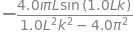

In [2]:
# check using sympy  1j is the Sympy definition of mathematical 'i' 

L, x, k = symbols( 'L, x, k',positive =True)

f01 = sin(2*pi*x/L)*exp(-1j*k*x)

g = simplify(integrate(f01,(x,-L,L),conds='none') )
g

which is the same result after converting the exponentials to the sine. This can be checked also by SymPy using the instructions $ \mathtt{ simplify( g.rewrite(sin) )} $.

The Fourier transform is, in this particular example, wholly the imaginary part of a complex number. When $k  = 0$ and when $Lk = \pm n \pi$, the transform is zero, except when $Lk = \pm 2\pi$ where the maximum or minimum occurs. When $Lk = +2\pi$, the transform has the nominal value of $0/0$, which can be evaluated using l'Hopital's rule (see Chapter 3). Remember to stop differentiating when either the top or bottom of the fraction is not zero, the result is

$$\displaystyle  \lim_{k \to 2\pi /L} \frac{-4\pi iL\sin(Lk)}{k^2L^2-4\pi^2} \to \frac{-4\pi i L^2\cos(Lk)}{2kL^2} = -\frac{2\pi i}{k} = -iL$$

which is the minimum value of the transform. The maximum occurs when $kL = -2\pi$, (see Fig. 19), which corresponds to the frequency $k = 2\pi /L \equiv \omega$ in radians, or 1/$L$ in Hz, if $L$ measures time. If $L$ is distance, cm for example, as in an FTIR spectrometer, then 1/$L$ is in wavenumbers or cm$^{-1}$.

To plot the transform, it is necessary to plot either the imaginary part (fig 19) or its absolute value; there is no real part in this particular example. Notice that there appear to be two frequencies, one at about 0.5 and at -0.5; negative frequencies do not make any sense if the sine wave is a signal from an experiment and for real experimental data, the negative frequencies need to be ignored. If the range $\pm L$ is kept the same, and instead of a sine, a cosine wave of the same frequency transformed, the real frequency part of the Fourier transform would now look like the imaginary part of Fig. 19.

As a sine wave of infinite extent has a single frequency the extra frequencies seen in Fig. 19 must arise due to the fact that this wave exists only between $\pm L$. The sudden change in value of the function at $\pm L$ corresponds to having several different frequencies present, although they are not apparently there. Put another way, if a Fourier series of this truncated sine wave had to be formed very many sines or cosines of a different frequencies would have to be included. Why several terms? A single sine wave normally extends to infinity, many waves of different frequency are needed to reinforce the values near $k = 0$ and simultaneously to cancel out the part where the amplitude is zero, between $-L \to -\infty$ and $L$ and $\infty$. Although, for practical purposes, these regions in the integration were ignored, this was only because the sine wave is zero here, but this does not mean that waves do not exist to make the amplitude zero. These terms produce the extra frequencies seen in the transform. Put another way, to understand the transform it is necessary to consider all the terms needed to describe the initial truncated function $f(x)$ as a Fourier series because it is exactly these terms that appear as frequencies in the transform.

![Drawing](fourier-fig19.png)

Figure 19. Graphs of $\sin(\omega x)$ from $\pm L$ when $L = 10$; its Fourier transform, the imaginary part (top right), and its spectrum, the square of its absolute value (bottom right). The real part of the transform is zero because $\displaystyle g(k)= -\frac{4i\pi }{k^2L^2-4\pi^2}\sin(Lk)$ has no real part. (The vertical scales are not the same, but the maximum value of the transform and its absolute value is $L$.)
_______

### **(ii) Exponential decay**

The fourier transform of an exponential decay $e^{-kt}$ has to be defined from zero as the decay has to start at $t=0$. The conjugate variable is $\omega$.  

$$\displaystyle \begin{align}g(\omega)&= \frac{1}{\sqrt{2\pi}}\int_0^\infty e^{-kt}e^{-i\omega t}dt\\
&= \frac{1}{\sqrt{2\pi}}\int_0^\infty e^{-(k+i\omega) t}= \frac{1}{\sqrt{2\pi}}\frac{e^{-(k+i\omega) t} }{-(k+i\omega)}\Bigg|_0^\infty\\&=\frac{1}{\sqrt{2\pi}} \frac{1}{{k+i\omega}}=\frac{1}{\sqrt{2\pi}}\left( \frac{k}{{k^2+\omega^2}} -i\frac{\omega}{{k^2+\omega^2}}\right) \end{align}$$

If the absolute value of $t$ is used $e^{-k|t|}$ this means that when $t>0$ we use $e^{-kt}$ and $e^{+kt}$ otherwise. The function $e^{-k|t|}$ is a double sided exponential that exponentially grows to maximum from negative $t$ to zero then decays away at $t \gt 0$.

$$g(\omega)= \frac{1}{\sqrt{2\pi}}\int_0^\infty e^{-kt}e^{-i\omega t}dt + \frac{1}{\sqrt{2\pi}}\int_{-\infty}^0 e^{+kt}e^{-i\omega t}dt$$

$$=\frac{1}{\sqrt{2\pi}} \frac{1}{{k+i\omega}} +\frac{1}{\sqrt{2\pi}} \frac{1}{{k-i\omega}}= \sqrt{\frac{2}{\pi}}\frac{k}{{k^2+\omega^2}}$$

If we were measuring some emission decay (fluorescence, phosphorescence) from a molecule or atom then the complex conjugate is measure by the 'square law' detector such as a photodiode, photomultiplier or CCD etc, then after fourier transforming the time profile to get the spectrum the result is 

$$\displaystyle g^*(\omega)*g(\omega) =\frac{1}{2\pi(k^2+\omega^2)}$$

which is a Lorenzian function and describes an ideal  spectral line as shown in fig 19a. 

If however, the time range over which the decay is measured is limited then a wider transition is observed and which has oscillating side bands. The result of integrating to a time $t$ instead of infinity and taking the complex conjugate is 

$$\displaystyle g^*(\omega)*g(\omega) =\frac{1}{2\pi(k^2+\omega^2)}+\frac{e^{-2kt}-2e^{-kt}\cos(\omega t)}{2\pi(k^2+\omega^2)}$$

which can be seen to be the ideal plus an exponentially decaying and oscillating part. At long times the second term tends to zero as it should.  The behaviour here is typical of what happens with a fourier transform pair, when measurement is limited in one variable, broadening response and oscillations occur in its conjugate variable.

### **(iii) Electromagnetic waves in a laser cavity**

In a laser cavity an electromagnetic wave of frequency $\omega_0$ builds up in amplitude to $E_0$. Suddenly the cavity is 'opened' at $t=0$ and the radiation leaks out as 

$$\displaystyle E(t)= E_0e^{-\omega_0 t/Q}e^{i\omega_0 t}$$

The dimensionless parameter $Q$ is the ratio of stored energy to energy loss /cycle and $\omega_0/Q$ is the rate of decay of the radiation in the cavity or $Q/\omega$ the radiation's cavity lifetime. We will calculate the intensity $I=|a(\omega)|^2$ vs frequency, which is the spectrum of the output radiation where $a$ is the fourier transform of $A$.

The transform is

$$\displaystyle a(\omega)=\frac{E_0}{\sqrt{2\pi}}\int_{0}^\infty e^{-\omega_0 t/Q}e^{i\omega_0 t}e^{-i\omega t} dt $$

rearranging and integrating gives,

$$\displaystyle  a(\omega)= \frac{E_0}{\sqrt{2\pi}}\int e^{ ( -i(\omega-\omega_0)t-\omega_0 t/Q}dt=\frac{E_0}{\sqrt{2\pi}} \frac{e^{ ( -i(\omega-\omega_0)t-\omega_0 t/(Q)}}{( -i(\omega-\omega_0)-\omega_0 /Q} \Bigg|_0^\infty=\frac{E_0}{\sqrt{2\pi}}\frac{1}{( i(\omega-\omega_0)+\omega_0 /Q}$$

The absolute value is $|a(\omega)|^2=a^*(\omega)a(\omega)$ which is 

$$\displaystyle |a(\omega)|^2=\frac{E_0}{\sqrt{2\pi}}\frac{1}{( -i(\omega-\omega_0)+\omega_0 /Q}\frac{1}{( i(\omega-\omega_0)+\omega_0 /Q}=\frac{E_0}{\sqrt{2\pi}}\frac{1}{(\omega-\omega_0)^2-(\omega_0 /Q)^2}$$

where in the last step $(a-b)(a+b)=(a^2-b^2)$ was used. The shape of the is curve is called Lorenztian. As the $Q$ of the cavity gets larger the sharper is the spectral (resonance) line width, i.e. the cavity produces radiation of a narrower bandwidth. A high-Q cavity is needed for example in a laser used for high resolution spectroscopy or to produce a Q-switched nanosecond laser pulse. 

![Drawing](fourier-fig19a.png)

Figure 19a. Resonance lines with different Q. The peaks are normalised to 1 at $\omega_0$ but in reality the lower Q has a smaller area, i.e. produced from a cavity with less stored energy.
________

## 6.4 How the Fourier transform works

The transform appears to have the effect of seeking out any repetitive features in a signal $f(x)$. This is true whether it is the discrete transform acting on real data, or the mathematical transform of a sine wave or other function. To understand what the transform does, we must look at eqn 27,

$$\displaystyle  g(k) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x)e^{-ikx}dx $$

and recall that this only gives the value at one point $k$. To obtain the transform, $k$ has to vary from -${\infty} \to \infty$ although in practice only a limited range is needed to observe the major features of the transform. In this exponential form, the oscillating nature of the argument is not so apparent, but writing it as

$$\displaystyle  g(k) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(x)(\cos(kx)-i\sin(kx))dx $$

shows that the function $f$ is multiplied by a sine and cosine and integrated. Because $k$ can take any value, the sine and cosine of all possible frequencies multiply $f$. Most of the time, multiplication results in a highly oscillatory function, with as many positive parts as negative ones, and the integral evaluates to zero or something very close to it. 

When the period of $f$ is close to, or the same as, that of the sine or cosine, when multiplied together these no longer integrate to give zero. Hence, the particular frequency determined by $k$ gives the transform its value. This effect is pictured in Fig. 20. The left-hand column shows a function $f$ (top image) with a long period compared to a particular frequency of the sine wave in the transform at some value of $k$, middle image left. The bottom left curve shows the product of these two curves. The integral of this product, the area under the curve, almost evaluates to zero, with the positive and negative parts cancelling. 

The middle graph of the right-hand column shows a different frequency of the sine wave, because $k$ now has a different value in $\sin(kx)$, and the sine wave's period now matches that of the function $f$; their product is now positive and its integral is not zero. The Fourier transform therefore selects this frequency from among all others. Naturally, if there are several frequencies present in the function, these are each picked out in a similar manner as $k$ changes.

![Drawing](fourier-fig20.png)

Figure 20. Left column: The function $f(x)$ has a period that is very different from that of the sine wave $\sin(4kx)$ middle curve. Their product, lowest left-hand curve, oscillates about zero and integrates to zero or very close to it and so appears as an insignificant feature in the transform. <br>
Right column: The period of the sine wave, (middle curve) which is determined by $k$, is now changed compared to the left-hand figure and now matches the period of the function. The product $f(x)\sin(kx)$ is now only positive, and integrates to a finite number and so appears as a peak in the transform.
_______

## 6.5 Phase sensitive detection and the lock-in amplifier

In measuring signals buried in noise, the technique of phase sensitive detection is a very effective way of extracting the data and removing noise. In this method, the input to an experiment is modulated at a fixed frequency and the signal produced by the experiment is measured at this same frequency by a device known as a _lock-in amplifier_. This device illustrates the principle underlying the Fourier transform, although it is not a transform method.

In using a lock-in amplifier to measure fluorescence the light used to excite the molecules, and so stimulate the fluorescence, is modulated by rotating a slotted disc (chopper) in the exciting light's path. The photomultiplier or photodiode detects the modulated (on - off ) fluorescence signal together with any noise and this signal is passed to the lock-in amplifier. The lock-in also receives a reference signal directly from the chopper and it electronically multiplies this with the fluorescence signal (see fig 20). The schematic of an instrument is shown in Fig.21. 

Multiples (higher harmonics) of the fundamental reference frequency are filtered away, the resulting signal is integrated over many periods of the fundamental frequency, and a DC output signal is produced. As shown in Fig. 20, when the product of reference and signal is integrated, frequencies dissimilar to the reference, $f(x)$ in the figure, will average to something approaching zero.

If the reference signal is $r = r_0\sin(\omega t)$ and the noise free signal $s = s_0\sin(\omega t + \varphi)$ then the output of the lock-in is

$$\displaystyle  V_s= \frac{r_0s_0}{T}\int_0^T \sin(\omega t + \varphi)\sin(\omega t)dt$$

where $T = 2\pi n/\omega$ and $n \gg$ 1 is an integer and $\varphi$ is the phase (time) delay between the reference and the signal and is due to detectors and the amplifiers and other components in the experiment, but can be changed by the user. Expanding the sines and integrating gives

$$\displaystyle  V_s= \frac{r_0s_0}{T}\int_0^T \cos(\varphi)-\cos(2\omega t+\varphi)dt\\
=\frac{r_0s_0}{4\omega T}\big(\sin(\varphi)+2T\omega \cos(\varphi)-\sin(2\omega T+\varphi) \big) $$

The sine at twice the reference frequency is electronically filtered away leaving a signal that is constant because $T$ is the integration time set by the experimentalist and normally ranges from a few milliseconds to a few seconds. The measured signal is

$$\displaystyle V_s=\frac{r_0s_0}{4\omega T} \big(\sin(\varphi)+2T\omega \cos(\varphi) \big)   \tag{29}$$

and as the phase $\varphi$ can be adjusted by the user, this signal can be maximized when $\theta=\tan^{-1}(1/(2T\omega))$.

Now consider the situation when noise is present and assume that this has a wide range of frequencies $\omega_{1,2..}$ and amplitudes $n_{1,2..}$. The signal from an instrument is normally noisy and is represented as

$$\displaystyle s_0\sin(\omega t+\varphi)+n_1\sin(\omega _1t+\varphi_1)+n_2\sin(\omega _2t+\varphi_2)+\cdots$$

where $s_0, \omega$, and $\varphi$ are respectively the amplitude, frequency, and phase (relative to the reference) of the data. 

The first term of the signal arises from the information we wish to measure and produces $V_s$ equation (29). We need only consider one noise term, for all the others behave similarly. Multiplying by the reference at frequency $\omega$ but ignoring the phase $\varphi$, as this adds nothing fundamental but makes the equations more complicated, gives the term,

$$\displaystyle 2\sin(\omega_1 t)\sin(\omega t)=\cos((\omega-\omega_1)t)-\cos((\omega+\omega_1)t) $$

Integrating produces

$$\displaystyle \begin{align} V_n &= \frac{r_0n_1}{2T} \int_0^T \cos((\omega-\omega_1)t)-\cos((\omega+\omega_1)t) dt\\ &=\frac{r_0n_1}{4T} \left( \frac{ \sin\big((\omega_1-\omega)T\big)}{\omega_1-\omega}  -\frac{\sin\big((\omega_1+\omega)T\big)}{\omega_1+\omega}  \right) \end{align}$$

The sum frequency term is filtered by the instrument and is removed from the output leaving the term $\displaystyle \frac{ \sin((\omega_1-\omega)T)}{\omega_1-\omega}$ which is the sinc function, see Fig. 15. Suppose that the frequency $\omega_1$ represents white noise that contains all frequencies more or less equally. As these frequencies differ from $\omega$ and the absolute value $| \omega_1-\omega |$ becomes larger the sinc function rapidly becomes very small. This means that the reference sine wave picks out just that frequency containing the signal and rejects almost all of the noise. The total signal is $V + V_n$ and although it still contains noise at the reference frequency $\omega$ it contains very little at other frequencies, and the signal to noise ratio is increased very considerably. Often signals can be extracted from what appears to be completely noisy data.

As a practical consideration, the reference frequency should always be chosen to be a prime number so that the chance of detecting one of the multiples of electrical mains frequency is reduced. Also, this frequency should be in a region where the inherent noise of the experiment is low and if possible be of a high enough frequency to allow a short time $T$ to be used in the integration step, allowing many separate measurements to be made in a reasonable time.

![Drawing](fourier-fig21.png)

Figure 21. Schematic of phase sensitive detection and a lock-in amplifier.
________

## 6.6 Parseval or Plancherel  theorem.

This theorem is important because it proves that there is no loss of information when transforming between Fourier transform pairs. This is rather important because otherwise how would it be possible to tell what information has been lost or added? Fortunately, it can be shown that

$$\displaystyle \int_{-\infty}^{\infty} g^*(k)g(k)dk = \int_{-\infty}^{\infty} f^*(x)f(x)dx  \tag{30}$$

where the asterisk denotes the complex conjugate. The Fourier transform of $f(x)$ is $g(k)$, which is integrated over its variable $k$, and similarly $f(x)$ is integrated over its variable $x$. As the total integral taken over all coordinate space $x$ and that over its conjugate variable $k$ is the same, all the information in the original function is retained in the transformation, i.e. it looks as if the transform is a different beast but this is only a disguise as it contains exactly the same information. This, of course, means that if something is done to the transform, then, in effect, the same is done to the function.

The Plancherel theorem (also called Rayleigh's theorem as it was first used by him in the theory of Black-Body radiation) is effectively the same but usually written as 

$$\displaystyle  \int_{-\infty}^{\infty} |g(k)|^2dk = \int_{-\infty}^{\infty} |f(x)|^2 dx $$

Graphically it means that the shaded areas are the same. The figure shows the transform of a square wave as in fig 15. The transform is 

$$\displaystyle g(k)=\frac{\sin(ak)}{ak}$$

where $a = 4$. The function $f(x) = 1 $ in the range $-2\to 2$ so $\int f(x)^2 dx= 4$. 

![Drawing](fourier-fig21a.png)

Figure 21a. Illustrating the Parseval or Plancherel theorem. The shaded areas are the same size, although they do not appear to be. The absolute square of the transform $|g(k)|^2$ extends to $\pm \infty$ which makes up the area since the function is always positive a small part of which is shown magnified.
___________

This theorem is very important in quantum mechanics. Should $f(x)$ represent a wavefunction that varies as a function of distance $x$, which could be the displacement from equilibrium of an harmonic oscillator, then variable $k$ can be interpreted as the momentum (usually given the letter $p$) making $g(k)$ the wavefunction in 'momentum space'. This means that calculations can be formed either in spatial coordinates, i.e. distance or in 'momentum space' depending upon which is the most convenient mathematically. The change in displacement, $\delta x$, and change in momentum, $\delta p$, are conjugate pairs of variables and are linked by the Heisenberg uncertainty principle $\delta x\delta p \ge \hbar/2$.

If $x$ is time $t$ and $k$ frequency $\omega$ then Parseval's theorem has a simple physical interpretation. On the right of the equation $f(t)$ is the electric field of some radiation, for example i.r. in a spectrometer or a laser pulse, then $|f(t)|^2$ is proportional to the total radiated power and the integral the total radiated energy.  On the left, $\int|g(\omega)|^2d\omega$ is the total amplitude squared of the spectrum, and $g(\omega)$ the energy per unit frequency interval. Thus Parseval's theorem represents the conservation of energy.

### **(i) The delta function as an integral**

The Parseval theorem can be proved using the delta function in its integral form. First we find the delta function. Suppose that a fourier transform is inserted into itself, starting with eqn. 28,

$$\displaystyle  f(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty g(k)e^{+ikx}dk \qquad\tag{28}$$

then from eqn. 27 substitute $g(k)$ and change the dummy integration variable to $x'$ to avoid confusion, 

$$\displaystyle  f(x) = \frac{1}{2\pi} \int_{-\infty}^\infty   \int_{-\infty}^\infty f(x')e^{-ikx'}dx'e^{+ikx}dk $$

and by sleight of hand, interchange order of integration, 

$$\displaystyle  f(x) = \int_{-\infty}^\infty f(x') \left[\frac{1}{2\pi} \int_{-\infty}^\infty e^{-ik(x-x')}dk\right]dx'$$

For this equation to be true the expression in square brackets must now be interpreted as a delta function making

$$\displaystyle \delta(x-x')=\frac{1}{2\pi} \int_{-\infty}^\infty e^{-ik(x-x')}dk \tag{28a}$$

which means that one side is interpreted as having the same effect as the other, $\delta(x-x')=1$ if $x=x'$ otherwise it is zero and similarly for the integral. Recall that the delta function $\delta(x-x')$ picks out just one term in any integral at $x=x'$.

$$\displaystyle \int_{-\infty}^\infty f(x)\delta(x-x')dx = f(x') \tag{28b}$$

$$\displaystyle \int_a^b\delta(x-x')dx = 1 \text{ if } a\lt x\lt b \text{ otherwise } 0$$


The delta function also has these properties

$$\displaystyle \begin{array}{lll}\\ \hline \delta(x)&=\delta(-x)\\ x\delta(x)&=0\\ \delta(ax)&=\displaystyle\frac{1}{|a|}\delta(x)\\ \delta(x^2-a^2)&=\displaystyle\frac{1}{|a|}(\delta(x-a)+\delta(x+a))\\ \hline\end{array}$$

To prove the Parseval theorem we start with $\int|f(x)|^2dx=\int f(x)^*f(x)dx $ where * indicated the complex conjugate, substitute for $f(x)$ using eqn 28

$$\displaystyle \begin{align}\int_{-\infty}^{\infty} |f(x)|^2 dx &=\int_{-\infty}^{\infty}dx\frac{1}{2\pi}\int_{-\infty}^\infty g^*(k)e^{-ikx}dk\int_{-\infty}^\infty g(k')e^{+ik'x}dk' \\ &=\int_{-\infty}^{\infty} g^*(k)dk\int_{-\infty}^{\infty} g(k')dk'\left[\frac{1}{2\pi}\int_{-\infty}^\infty e^{i(k'-k)x} \right]dx\\&=\int_{-\infty}^{\infty} g^*(k)dk\int_{-\infty}^{\infty} g(k')\delta(k'-k)dk'=\int_{-\infty}^{\infty} g^*(k)g(k)dk=\int_{-\infty}^{\infty} |g(k)|^2dk \end{align}$$

###  **(ii) The delta function and comb of delta functions.**

Using a comb of delta functions and convoluting this with a more complex function is a direct way of making a repeated pattern such as an image or positioning molecules in each unit cell in a crystal. This image can then be fourier transformed to imitate the diffraction pattern expected from a given crystal.

A delta function has the property that it extracts just a single term from an integral, i.e. 

$$\displaystyle \int_{-\infty}^\infty f(x)\delta(x-x_0)dx = f(x_0)$$

and is because $\delta(0)=1$ and is otherwise zero. This is also its shifting property, the function is moved from $f(x)$ to $f(x_0)$, which is equivalent to multiplying its transform by a phase factor $e^{-ikx_0}$.

The delta function's transform is

$$\displaystyle g(k)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty \delta(x)e^{-ikx}dx =\frac{1}{\sqrt{2\pi}} e^{0}=\frac{1}{\sqrt{2\pi}}$$

and so the inverse transform of $\delta(x)$ is $1$ and so we can write 

$$\displaystyle \delta(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty e^{ikx}dk$$

and this means that the delta function is the transform of a constant value. The transform of $\cos(k_0x)$ can now be found when the cosine is put into its exponential form.

$$\displaystyle \begin{align} g(k)&=\frac{1}{2\sqrt{2\pi}}\int_{-\infty}^\infty (e^{ik_0x}-e^{-ik_0x})e^{-ikx} dx\\
&=\frac{1}{2\sqrt{2\pi}}\int_{-\infty}^\infty e^{-i(k-k_0)x}-e^{-i(k+k_0)x} dx\\
&=\frac{1}{2} (\delta (k-k_0)+\delta(k+k_0)) \end{align}$$

which means that the transform has two spikes at wavevector $\pm k_0$.  This expression can be used to describe interference by two thin slits producing Young's fringes. It also shows a single frequency in a transform corresponds to a cosine wave in 'real' space, i.e. an extended wave train containing a single frequency gives a 'spike' or a single line in its spectrum (i.e. its transform). This extends to several waves of different frequencies giving different lines in a spectrum. Of course, the negative frequency has no physical meaning.

The transform of a shifted delta function $\delta(x-x_0)$ is

$$\displaystyle g(k)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty \delta(x-x_0)e^{-ikx} dx =\frac{1}{\sqrt{2\pi}} e^{-ikx_0}$$

A function that is itself a sequence of delta functions is called 'comb' or 'sha' function,

$$\displaystyle f(x)=\sum_n \delta(x-x_n)$$

has a transform

$$\displaystyle g_n(k) =\frac{1}{\sqrt{2\pi}}\sum_ne^{-ikx_n}$$

When there is a series of equally spaced delta functions 

$$\displaystyle f(x)=\sum_{n=-\infty}^\infty \delta(x-na)$$

the transform is also never ending a series of delta functions. To sum the transform it is necessary to suppose that $n$ is a large number $N$ and do the summation as a geometric series

$$\displaystyle \sqrt{2\pi}g(x)=\sum_{n=-N}^N e^{-ikaN}=\frac{e^{iak(N+1)}-e^{-iakN} }{1-e^{-iak}}$$

which multiplying top and bottom by $e^{iak/2}$ and using the definition of a sine; $\sin(x)=(e^{ix}-e^{-ix})/2i$ produces

$$\displaystyle g(k)=\frac{1}{\sqrt{2\pi}}\frac{\sin\left((N+\frac{1}{2})ak\right)}{\sin\left(\frac{ak}{2}\right)} \tag{28c}$$

The function appears as a series of spikes separated by $2\pi/a$ when $N$ is large. Figure 21b shows the transform when $N=100, a=2$, and it is clear that the delta function is being approached even with small $N$. In the limit $N\to \infty$ the transform of a comb of separation $a$ is a comb of delta functions with separation $2\pi /a$. 

$$\displaystyle f(x)=\sum_{n=-\infty}^\infty \delta(x-na), \qquad g(k)=\frac{1}{\sqrt{2\pi}}\sum_{n=-\infty}^\infty \delta(x-2\pi n/a) \tag{28d}$$

![Drawing](fourier-fig21b.png)

Figure 21b. The transform of a comb of separation $a$ is a comb of separation $2\pi/a$. In this figure $N=100, a=2$. In the limit $N\to\infty$ a comb of $\delta$ functions result.
________________

The reason that the transform becomes more like a series of delta functions as $N$ increases is that as $N$ increases the frequency of the sine wave in the numerator increases but that of the denominator remains the same. These waves are only in phase at each $2\pi/a$ and as the high frequency numerator is oscillating very rapidly  positive and negatively compared to $ak/2$ it makes the ratio effectively zero elsewhere.  

## 6.7 Uncertainty Principle

It is known from experiment that when an emission line from an atomic or molecular transition has a very broad frequency spread, then the lifetime $\tau$ of the state involved is short lived and vice versa. This is called the 'time-energy' uncertainty relationship $\Delta E\tau \ge \hbar/2$ or equivalently $v\tau\ge 1/2$ as $E=hv$. A similar effect is observed when a time varying signal is measured for example a voltage  on an oscilloscope. The product of the signal's duration and its bandwidth (its spread in frequency) has a certain minimum value. This is a consequence of the variables, time and frequency being related via a fourier transform. Time and frequency are called _conjugate_ variables. 

To show this can be quite tricky since the variance of the transform has to be calculated and this may not be integrable. The proof is given by Bracewell 'The Fourier Transform and its Applications'. Instead of giving this proof to illustrate the effect some examples of particular cases are described.

As a measure of the spread in a value its standard deviation can be used, see Chapter 4 Integration eqn. 26. The square of the standard deviation is the variance and is defined as 

$$\displaystyle \sigma^2 =\langle x^2\rangle - \langle x\rangle^2$$

where the brackets $\langle \rangle$ indicate the average value. The average value of a function $p(x)$ is defined as 

$$\displaystyle \langle x_p\rangle= \frac{\int xp(x)dx}{\int p(x)dx}$$

and the average of the square 

$$\displaystyle \langle x_p^2\rangle= \frac{\int x^2p(x)dx}{\int p(x)dx}$$

The denominator is the normalisation. If the function is symmetrical about zero the mean is also zero and $\langle x\rangle=0$ and can be ignored. All that is necessary is to calculate $\langle f^2\rangle\langle g^2\rangle$ for a function $f$ and its transform $g$ and take the square root to obtain the standard deviation of the product. 

Often the transform and function may not be good distributions in which case their square is taken as the function to use thus we make the average squared ( also called the Energy Function) as 

$$\displaystyle \langle x^2\rangle= \frac{\int x^2f^*f dx}{\int f^*f dx}$$

and a similar equation for the transform $g$. As the function and transform is usually complex the square is obtained using the complex conjugate i.e. $p^2 \to p^*p$.

This method will be demonstrated below but sometimes the transform integrals become infinity, in this case we choose to take the deviation as the measure from the peak of the transform ($g$) to the first zero. 

### **(i) A Gaussian shaped pulse** 

A wavepacket comprising several waves of varying frequency can have an overall profile that is Gaussian in shape. This can apply, for example, to a laser pulse or a summation of harmonic oscillator wavefunctions. The normalised Gaussian function is 

$$\displaystyle f(t)= \frac{e^{-t^2/2\sigma^2}}{\sigma \sqrt{2\pi} } $$

where $\sigma$ is the standard deviation, or width of the Gaussian, see figure 4, Chapter 13 'Data Analysis'. The transform of a Gaussian is also a Gaussian but with a different width. 

$$\displaystyle g(v)= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(t)e^{-ivt} dt = \frac{1}{\sqrt{2\pi}}e^{-i\sigma^2v^2/2}$$

As the standard deviation of $f$ is by definition $\sigma$ and by comparison the standard deviation of $g$ must be $1/\sigma$ hence $\sigma_t\sigma_v=\sigma/\sigma=1$.

Calculating using the method outlined above to find $\langle t^2\rangle$ and $\langle v^2\rangle$ we expect a different result because we now use the square of the function and transform.

Taking all integrations between $\pm\infty$, the function 

$$\displaystyle  \int f(t)^2dt= \frac{1}{2a\sqrt{\pi}},\quad\text{and}\quad \displaystyle \int t^2f(t)^2dt = \frac{a}{4\sqrt{\pi}}$$

and their ratio is 

$$\displaystyle \Delta t= \frac{a^2}{2}$$

The transform has similar integrals

$$\displaystyle  \int g(v)^2dv= \frac{1}{2a\sqrt{\pi}}\quad\text{and}\quad \displaystyle \int v^2g(v)^2dv = \frac{1}{4a^3\sqrt{\pi}}$$

and their ratio is 

$$\displaystyle \Delta v= \frac{1}{2a^2}$$ 

The product of uncertainties after remembering that we calculate the square of the values is 

$$\displaystyle \Delta t\Delta v = \frac{1}{2}$$ 

which is the minimum possible value.

### **(ii) Excited state decay**

An excited electronic state can decay by emitting a photon, fluorescence if the transition is allowed, or phosphorescence if from a triplet excited state to a singlet ground state.  The time profile can be measured as can the spectral width of the transition and they demonstrate the time - energy/frequency relationship. The excited state has a lifetime $\tau$ and transition frequency $\omega_0$. A spatial analogue is momentum broadening as a result of collisions, where the lifetime is replace by the mean free path.

The field of the emitted photon is 

$$\displaystyle f(t)=e^{i\omega_0 t}e^{-t/2\tau}$$

which is that of a plane wave of frequency $\omega_0$ that decays away (or is damped) with a lifetime $\tau$. The detector measures the 'square' or absolute value squared of this which is 

$$\displaystyle |f(t)|^2\equiv f(t)^*f(t) = e^{-t/\tau}$$ 

The transform is 

$$\displaystyle g(\omega)= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty f(t)e^{-i\omega t} dt = \sqrt{\frac{2}{\pi}}\left(\frac{1}{2i (\omega-\omega_0)+1/\tau}\right)$$

making the measured spectral profile, which has the shape of a Lorentzian curve,

$$\displaystyle g(\omega)^*g(\omega)=\frac{2}{\pi}\left( \frac{1}{4(\omega-\omega_0)^2+1/\tau^2} \right) $$

The full width at half maximum of this curve is $1/\tau$ which makes $\Delta t\Delta \omega = \tau/\tau=1$.  Figure 54 in the answer to question 7 shows the exponential decay and the Lorentzian curves. As the energy is related to the frequency as $\Delta E =\hbar \Delta \omega$ then $\tau\Delta E = \hbar$

The calculation using $\displaystyle \int g(\omega)^2 d\omega$ as in the previous example will not work here because this integral is infinite.

### **(iii) Finite wave-train**

If a plane wave of frequency $\omega_0$  exists for a short time $\pm a$ and is zero elsewhere then over this range $\displaystyle f(t)=e^{i\omega t};\quad -a\le t \le a$, see figure 19 where $a=10$.  The spread of the wave $\Delta x = a$.  The 'square' of $f$ is $f(x)^*f(x)=1$

The transform has the form of a sinc function 

$$\displaystyle g(\omega)=\int_{-\infty}^\infty f(t)e^{-i\omega t}dt= \sqrt{\frac{2}{\pi}}\frac{\sin\left( a (\omega-\omega_0)\right)}{\omega-\omega_0}$$

The function $g^2$ cannot be normalised easily as it produces another integral (the Sine integral) but it is clear that the zeros of the function are at the same place in $g$ and its square and so we can take the spread $\Delta \omega$ to be the value from $\omega_0$ to the first minimum. The zeros of the sinc function occur at $\mathrm{sinc}(n\pi)$ where $n$ is an integer greater than zero, thus the first zero occurs at $\pm \pi/a$ from the central frequency, see figure 15.

If this zero is associated with $\Delta \omega$ then $\Delta \omega =\pi/a$ and the product $\Delta x\Delta \omega= \pi$.

### **(iv) Heisenberg Uncertainty**

The relationship  $\Delta \omega\Delta x \ge 1$ as described in the last example above is not an inherent property of quantum mechanics but is a property of Fourier Transforms. The last example shows that  it is not possible to form a train of electromagnetic  waves for which it is possible to measure, at the same time, the position and wavelength with complete accuracy. 

However, when considering quantum mechanics a particle is given wavelike properties via the de-Broglie relation. Such a material particle (such as an electron or a molecule) of energy $E$ and momentum $\vec p$ is now associated with a wave of angular frequency $\omega=2\pi\nu$ and wavevector $\vec k$ i.e. $E=\hbar\omega; \vec p=\hbar \vec k$ and leads to $\Delta x\Delta p \ge \hbar/2$. The fact that the Schroedinger equation is linear and homogeneous means that for particles a superposition principle applies which gives them wavelike properties. The small value of Planck's constant makes the limitations of the uncertainty principle totally negligible for anything macroscopic, i.e. greater than approx micron size. 

## 6.8 Summary of some  Fourier Transform properties

$$\displaystyle 
\begin{array}{ll}
\hline
&\text{The transform pair is} &   f (x)& \rightleftharpoons      & g(k)\\[0.15cm] 
\text{(i)}&\text{Shift or delay }   &   f (x - x_0)    & \rightleftharpoons & e^{- ikx_0}g(k)\\[0.15cm]     
\text{(ii)}&\text{frequency shift}  &   f (x)e^{ik_0x} & \rightleftharpoons & g(k - k_0) \\[0.15cm]
\text{(ii)}&\text{Scaling/Similarity} \quad a \gt 0  & \displaystyle   f(ax) & \rightleftharpoons & \displaystyle \frac{1}{ |a|}g\left(\frac{k}{a}\right)\\[0.15cm]
\text{(iv)}&\text{Reversal }            &   f (-x)    & \rightleftharpoons & g(-k) \\[0.15cm]
\text{(v)}&\text{Complex Conjugate }    &   f (x)^*   & \rightleftharpoons & g(-k)^* \\[0.15cm]
\text{(vi)}&\text{Derivative}      & \displaystyle   F\left(\frac{d}{dx}f(x)\right) & \rightleftharpoons &ik\,g(k)\\[0.15cm]
\text{(vii)}& n^{th}\text{ Derivative}     & \displaystyle   F\left(\frac{d^n}{dx^n}f(x)\right) & \rightleftharpoons &(ik)^n\,g(k)\\[0.15cm]
\text{(viii)}&\text{Derivative} & \displaystyle F\left(\frac{d}{dt}f(x,t)\right)& \rightleftharpoons & \int \displaystyle \frac{d}{dt}g(k,t)e^{-ikx} dx \\[0.15cm]
\text{(ix)}&\text{Product}      & F(xf(x)) & \rightleftharpoons &\displaystyle i\,\frac{d}{dk}g(k)\\[0.15cm]
\text{(x)}&\text{linearity} & F\left(af_a(x) + bf_b(x)\right)& \rightleftharpoons & ag_a(k) + bg_b(k)\\ 
\hline
\end{array}
$$

The capital $F(\cdots)$ means 'do the transform'. The derivation of these results is given below.

### **(i), (ii) Shift, delay.**

$\qquad$Let $s=x-x_0$ then $ds=dx$ and provided $f$ exists at $x_0$,

$$\displaystyle F(f(x- x_0)) = \int_{-\infty}^{\infty} f(x- x_0)e^{-ik x}dx = \int_{-\infty}^{\infty} f(s)e^{-ik(s+ x_0)}ds = e^{-ik x_0} g(k)$$

### **(iii) Scaling/Similarity.**

$\qquad$Make the substitution $s=ax,\; a>0$

$$\displaystyle F(f(ax))=\int_{-\infty}^{\infty}f(ax)e^{-ikx}dx=\frac{1}{|a|}\int_{-\infty}^{\infty}f(s)e^{-iks/a}ds=\frac{1}{|a|}g\left(\frac{k}{a}\right)$$

### **(iv) Reversal.** 

$\qquad$Start with scaling (as above (iii) ) and let $a=-1$ giving 

$$\displaystyle F(f(-x)) = g(-k)$$

### **(v) Complex conjugate.**

$$\displaystyle g(-k)= \int_{-\infty}^\infty f(x)e^{ikx}dx$$

$\qquad$taking the complex conjugate of both sides gives

$$\displaystyle g(-k)^*= \int_{-\infty}^\infty f(x)^*e^{-ikx}dx=f(x)^*$$

### **(vi)(vii) Fourier derivatives.** 

$\qquad$These are important when solving differential equations. First derivative

$$\displaystyle \begin{align} 
F\left(\frac{df}{dx}\right)  = \int_{-\infty}^\infty \frac{df}{dx}e^{-ikx}\, dx
\end{align}$$

$\qquad$Integrate by parts using $\int udv=uv-\int vdu$ where $u=e^{-ikx}$ and $dv=df/dx$ gives

$$\begin{align} F\left(\frac{df}{dx}\right)&= \left |f(x)e^{-ik x}\right |^\infty_{-\infty} + ik \int_{-\infty}^\infty f(x)e^{-ik x} \,dx\\  & =0+ ik F\left( f(x)\right) \\ & =  ik g(k) \end{align}$$

$\qquad$By induction the $n^{th}$ derivative's transform is 

$$\displaystyle F\left(\frac{d^nf}{dx^n}\right)=(ik)^n g(k)$$

### **(viii) Product.** 

$\qquad$The product $xf(x)$ can be useful in solving differential equations.

$$\displaystyle \begin{align}F\left(xf(x)\right)&=\int_{-\infty}^{\infty} xf(x)e^{-ikx}dx =\int_{-\infty}^{\infty} f(x)\frac{d}{dk}\left(ie^{-ikx}\right) dx\\&=i\frac{d}{dk}\int_{-\infty}^{\infty} f(x)e^{-ikx} dx=i\frac{d}{dk}g(k)\end{align}$$

### **(i,ii)  Example using the Shift Theorem**

When we measure a spectrum we expect to see a number of lines depending on the particular molecules being excited. These lines each have their own width and energy, i.e wavelength or frequency. However, if the light entering the spectrometer has a little of it delayed, such as by a beam splitter, and which then enters the spectrometer extra lines can be observed due to the phase-change introduced by the delay. The extra lines are caused by beating between the two light fields. The experimental detail is shown in the diagram.

![Drawing](fourier-fig21c.png)

figure 21c. Left The arrangement whereby two beams enter the spectrometer. Right The spectrum as it should be (left) and (right) after contamination with a little ($5$%) of the delayed beam. The ripples are separated in frequency by $2\pi/\Delta$.
____________

If the spectrum has the field $E(t)$ the detector measures the absolute value squared of the fourier transform $F$ of the total field, which in this case is the sum of the direct and reflected parts, i.e. a 'square law detector' measures

$$\displaystyle W(\omega)=\bigg| F\big (E(t)+cE(t-\Delta)\big)\bigg|^2$$

where $\Delta$ is the time delay and $c$ the amount in the delayed beam. This is single a part of the autocorrelation of the field $E$ taken at one delay $\Delta$. Using the Shift Theorem produces

$$\displaystyle \begin{align}W(\omega)&=\bigg|E(\omega)(1+ce^{-i\omega\Delta})\bigg|^2\\
&= |E(\omega)|^2(1+ce^{-i\omega\Delta})(1+ce^{+i\omega\Delta})\\
&= |E(\omega)|^2(1+c^2+2c\cos(\omega \Delta))\end{align}$$

where the identity $2\cos(\theta)=e^{+i\theta}+e^{-i\theta}$ was used.  This expression shows us that the spectrum $E(\omega)$ now has oscillations/ripples that might look like new transitions but are an artefact of allowing two beams into the spectrometer. The frequency separation between peaks of the ripples is $2\pi/\Delta$. The way round this problem is either to use a beam-splitter that is anti-reflection coated on its far side, or use a far thicker one and use a knife edge to remove the weaker beam. Alternatively use a very thin (pellicle) beam-splitter so that the frequency $2\pi/\Delta$ is too large to interfere in the the measured spectrum.

The spectrum is shown in fig. 21c. The fringes are very clear even when $c$ is small, for example the figure shows the spectrum when $c=0.05$ or $5\text{%}$ of the more intense beam. The oscillation at the peak is $\approx \pm 10\text{%}$ of the peak height, rather large for such a small amount of extra light.

## 6.9 Table of useful Fourier transforms
The capital $F(\cdots)$ means 'do the transform'.

$$\displaystyle \begin{array}{ll}
\hline
\text{(i) Gaussian} &f(x)=e^{-ax^2}     & F(f(x)) & \rightleftharpoons &\displaystyle \frac{1}{\sqrt{2a}}e^{-k^2/(4a)}\\[0.15cm]
\text{(ii) cosine }&f(x)=\cos(2\pi k_0 x)    & F(f(x)) & \rightleftharpoons &\frac{1}{2}(\delta(k-k_0)+\delta(k+k_0))  \\[0.15cm]
\text{(iii) sine }&f(x)=\sin(2\pi k_0 x)    & F(f(x)) & \rightleftharpoons &\frac{1}{2}i(\delta(k+k_0)-\delta(k-k_0))  \\[0.15cm]
\text{(iv) exponential }&f(x)=e^{-2\pi k_0 |x|}    & F(f(x)) & \rightleftharpoons &\displaystyle \frac{1}{\pi}\frac{k_0}{k^2+k_0^2}  \\[0.15cm]
\text{(v) sinc }&f(x)=\sin(x)/x    & F(f(x)) & \rightleftharpoons  & \text{top hat, }\\
& & & &1 \text{ if } 1/2\le x\le 1/2\; \text{ else } 0 \text{ (fig }15) \\[0.15cm]
\text{(vi) complex exponential }&f(x)=e^{ik_0x}    & F(f(x)) & \rightleftharpoons & \delta(k-k_0) \\[0.15cm]
\text{(vii) a constant} & f(x)=1& F(f(x))=& \rightleftharpoons & \delta(k) \\[0.15cm]
\hline\end{array}$$